In [83]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline

In [29]:
df = pd.read_csv('btc.csv')

In [30]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [32]:
df.shape

(4857377, 8)

### verificar a existencia de dados nulos

In [33]:
df.isna().sum().any()

True

In [34]:
df.isna()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4857372,False,False,False,False,False,False,False,False
4857373,False,False,False,False,False,False,False,False
4857374,False,False,False,False,False,False,False,False
4857375,False,False,False,False,False,False,False,False


<AxesSubplot:>

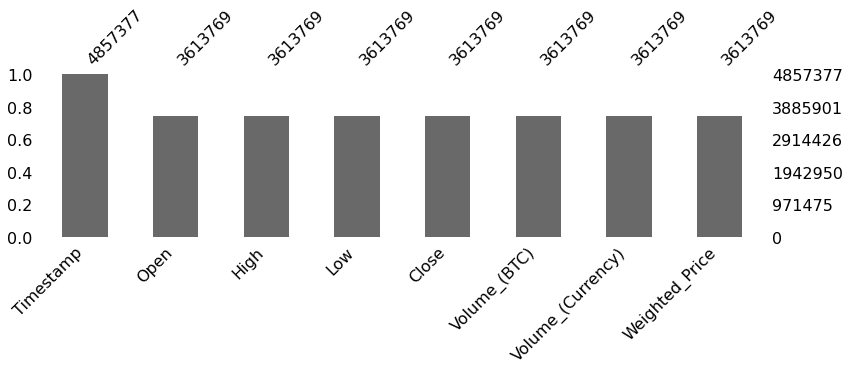

In [35]:
msno.bar(df, figsize=(13,3))

In [36]:
df.nunique()

Timestamp            4857377
Open                 1059732
High                 1030826
Low                  1046536
Close                1058685
Volume_(BTC)         3181865
Volume_(Currency)    3562603
Weighted_Price       3046022
dtype: int64

In [37]:
df['Close']

0              4.39
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
4857372    58686.00
4857373    58685.81
4857374    58723.84
4857375    58760.59
4857376    58778.18
Name: Close, Length: 4857377, dtype: float64

In [38]:
df.dropna()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [39]:
df['Close'].value_counts(normalize=True)

450.00      2.020052e-04
580.00      1.984078e-04
570.00      1.912131e-04
620.00      1.806978e-04
635.00      1.806978e-04
                ...     
883.29      2.767194e-07
5648.54     2.767194e-07
8552.20     2.767194e-07
16110.13    2.767194e-07
12771.98    2.767194e-07
Name: Close, Length: 1058685, dtype: float64

In [40]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


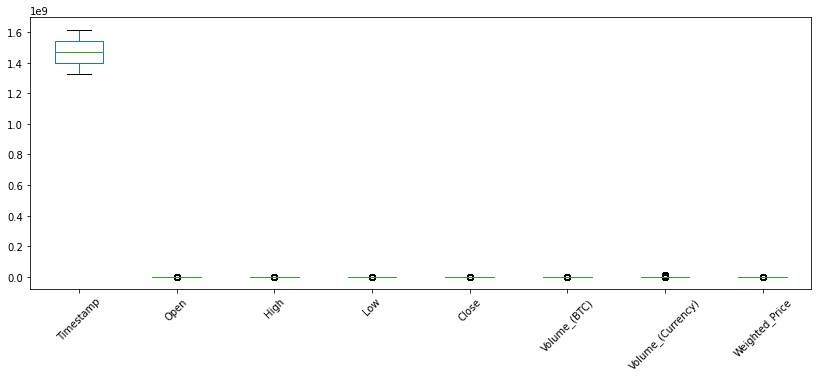

In [41]:
df.plot(kind='box', figsize=(14, 5), rot=45);

In [42]:
# pd.crosstab(df['Open'], df['Close'], normalize='index')

In [43]:
df['Close'].nunique()

1058685

In [44]:
df['Open'].nunique()

1059732

In [45]:
#df.plot(kind='bar')

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()

In [47]:
df2 = df

In [52]:
df2 = df2.dropna()

In [63]:
x = df2[['Close']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset = pd.DataFrame(x_scaled)
dataset['Close'] = df2['Close']

In [65]:
df2['Close']

0              4.39
478            4.39
547            4.57
548            4.58
1224           4.58
             ...   
4857372    58686.00
4857373    58685.81
4857374    58723.84
4857375    58760.59
4857376    58778.18
Name: Close, Length: 3613769, dtype: float64

In [64]:
x_scaled

array([[4.67786657e-05],
       [4.67786657e-05],
       [4.96922158e-05],
       ...,
       [9.50502668e-01],
       [9.51097518e-01],
       [9.51382237e-01]])

df2 

In [59]:
df2

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [70]:
predict_day = 30
df2['Prediction'] = df2[['Close']].shift(-predict_day)

/home/fabricio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
df2

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Prediction
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,6.15
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,6.19
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,6.23
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,6.25
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,6.46
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,NaN
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,NaN
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,NaN
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,NaN


Text(0, 0.5, '$ Priço')

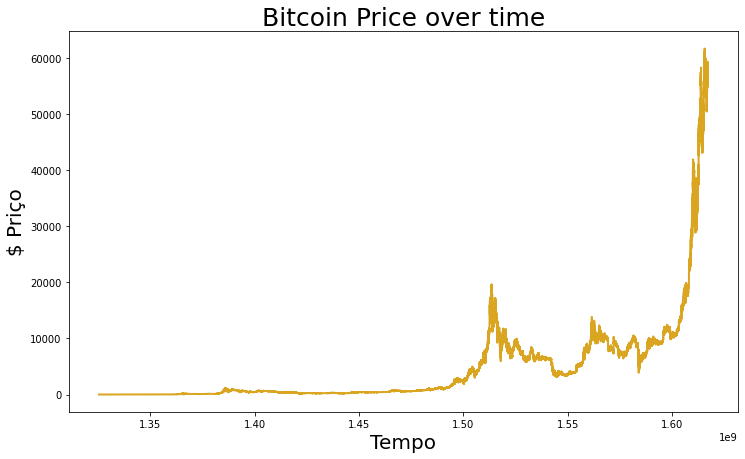

In [78]:
plt.figure(figsize = (12, 7))
plt.plot(df2["Timestamp"], df2["Weighted_Price"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Tempo", size=20)
plt.ylabel("$ Priço", size=20)

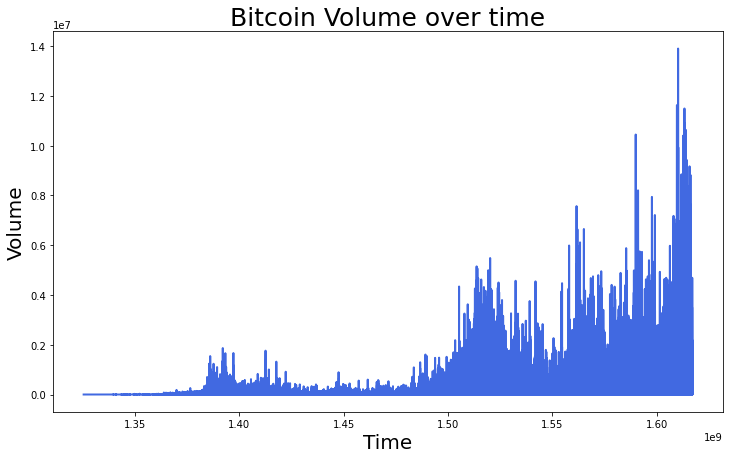

In [79]:
plt.figure(figsize = (12, 7))
plt.plot(df2["Timestamp"], df2["Volume_(Currency)"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [80]:
df2['Dates'] = pd.to_datetime(df2['Timestamp'], unit='s')
df2.head()

/home/fabricio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Prediction,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,6.15,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,6.19,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,6.23,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,6.25,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,6.46,2012-01-01 04:16:00


In [81]:
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'

In [84]:
x_train, x_test, y_train, y_test = train_test_split(
df2[required_features],
df2[output_label],
test_size = 0.3
)

In [85]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
model.score(x_test, y_test)

0.9999993718161018

In [87]:
future_set = df2.shift(periods=30).tail(30)

In [89]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Preço')

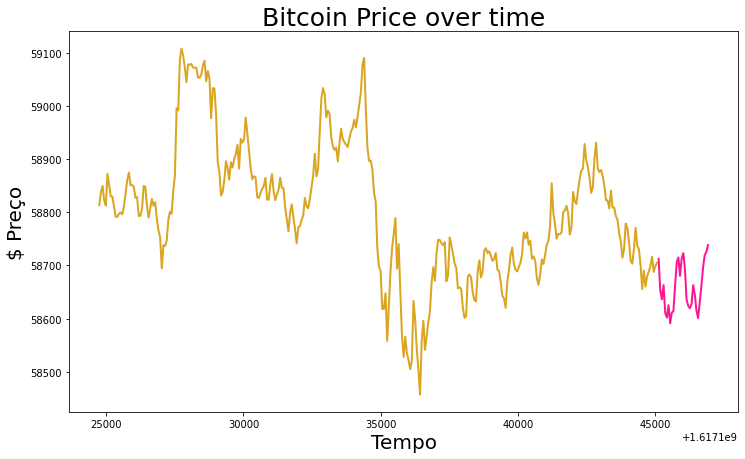

In [91]:
plt.figure(figsize = (12, 7))
plt.plot(df2["Timestamp"][-400:-60], df2["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Tempo", size=20)
plt.ylabel("$ Preço", size=20)